# Seattle's benchmark for carbon-neutral by 2050 

## Context
 - The City of Seattle's benchmark policy is to reduce energy use and greenhouse gas emissions from existing buildings and achieve a zero net greenhouse gas (GHG) emissions by 2050. To achieve this goal, careful surveys of the energy consumption, gas emissions, and building properties (such as size, number of floors, parking etc) were conducted by city staff in 2016 and made available at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy. However, these surveys are expensive to obtain, and from the ones already done, they want to try to predict the CO2 emissions and total energy consumption of non-housing buildings for which they have not yet been measured. 

## Task
 - To achieve this goal, I am looking closely look at the documented consumption and emissions data of non-housing buildings in the City of Seattle to predict the CO2 emissions and total energy consumption of non-residential buildings that have not yet been measured.
 - I will also evaluate and integrate the value of the "ENERGY STAR Score" for emissions prediction, which is tedious to calculate with the approach currently used. 

### Part 1
 - Data preparation and cleaning, exploratory analyses, and feature engineering

### 1.0 Data loading

In [1]:
# import libraries for data manipulation and visualization

import pandas as pd # for data loading, manipulation, and exploration
import numpy as np # for linear algebra/vector arithmetic

# statistical data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st 

# allow plot to appear within the notebook
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file and save as Data
Data = pd.read_csv('Energy_Benchmarking.csv')

# display the first and last five rows
Data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


## 2.0 Pre-exploratory analysis

In [3]:
# Summary of dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [4]:
# Dimension of the dataset (number of rows vs columns)
Data.shape

(3376, 46)

 - The dataset contains 3376 rows (observations) and 46 features

In [5]:
# check for duplicated rows
Data.duplicated(subset=['OSEBuildingID']).sum()

0

 - The dataset does not contains any duplicated observation

In [6]:
Data.isna().sum().sort_values(ascending=False)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
SourceEUIWN(kBtu/sf)                  9
SourceEUI(kBtu/sf)                    9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
TotalGHGEmissions                     9
SteamUse(kBtu)                        9
GHGEmissionsIntensity                 9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SiteEnergyUseWN(kBtu)                 6


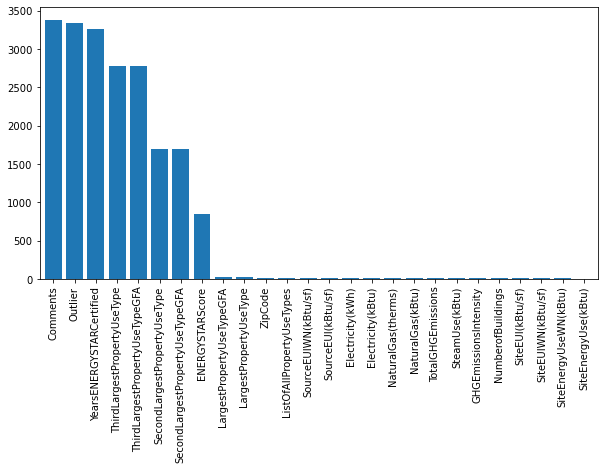

In [7]:
missing_values = Data.isna().sum().sort_values(ascending=False)#*100/len(Data_filter_2)
plt.figure(figsize = (10,5))
missing_values[missing_values>0].plot(kind = 'bar', width =0.8)
plt.show()

 - Comments, Outlier, YearsENERGYSTARCertified, ThirdLargestPropertyUseType, and ThirdLargestPropertyUseTypeGFA features have the largest number of missing values in the data set
 - Most of the features have a little to no missing value. 

### 2.1 Data preparation
 - filtering, wrangling, and cleaning

#### 2.1.1 Filtering of only non-residential buildings

In [8]:
# display list of building types
Data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [9]:
# Select non-residential building
B_Type = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']
Data_filter = Data.loc[Data['BuildingType'].isin(B_Type)]

In [10]:
# display list of primary property types
Data_filter['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [11]:
# further filtering non-residential building based on primary property type
P_Type = ['Hotel', 'Other', 'Mixed Use Property', 'K-12 School', 'University', 'Small- and Mid-Sized Office', 
          'Self-Storage Facility', 'Warehouse', 'Large Office', 'Medical Office', 'Retail Store', 'Hospital', 
          'Distribution Center', 'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory', 
          'Refrigerated Warehouse', 'Restaurant', 'Office']
Data_filter_1 = Data_filter.loc[Data_filter['PrimaryPropertyType'].isin(P_Type)]

In [12]:
# further filtering of non-residential building based on Largest Property Use Type 

Data_filter_1['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center'

In [13]:
# remove residential/lodging hall, Multifamily Housing, etc

LP_Type = ['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly','Library', 'Fitness Center/Health Club/Gym', 
           'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School', 'College/University', 'Automobile Dealership', 
           'Office', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', 'Other - Mall', 'Medical Office',
           'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum', 
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other/Specialty Hospital', 'Financial Office', 
           'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory', 
           'Supermarket/Grocery Store', 'Convention Center', 'Urgent Care/Clinic/Other Outpatient', 'Other - Services', 
           'Strip Mall', 'Wholesale Club/Supercenter','Refrigerated Warehouse', 'Manufacturing/Industrial Plant', 
           'Other - Recreation', 'Lifestyle Center', 'Other - Public Services', 'Other - Education', 'Fire Station', 
           'Performing Arts', 'Bank Branch', 'Other - Restaurant/Bar', 'Food Service', 'Adult Education', 'Other - Utility', 
           'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Pre-school/Daycare']

Data_filter_2 = Data_filter_1.loc[Data_filter_1['LargestPropertyUseType'].isin(LP_Type)]

 - Remove suffix 'other -' in the property type columns

In [14]:
other_list = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 
              'ThirdLargestPropertyUseType']
for type in other_list:
    Data_filter_2[type] = Data_filter_2[type].str.replace('Other - ', '')

In [15]:
# Capitalize only first character of each word in Neighborhood 
Data_filter_2['Neighborhood'] = Data_filter_2['Neighborhood'].str.title()

#### 2.1.2 Feature reduction and selection of important columns

In [16]:
Data_filter_2.isna().sum().sort_values(ascending=False)/len(Data_filter_2)

Comments                           1.000000
Outlier                            0.989994
YearsENERGYSTARCertified           0.938712
ThirdLargestPropertyUseType        0.789869
ThirdLargestPropertyUseTypeGFA     0.789869
SecondLargestPropertyUseTypeGFA    0.484678
SecondLargestPropertyUseType       0.484678
ENERGYSTARScore                    0.342714
ZipCode                            0.008130
SiteEnergyUseWN(kBtu)              0.000625
SiteEUIWN(kBtu/sf)                 0.000625
SiteEUI(kBtu/sf)                   0.000625
NaturalGas(kBtu)                   0.000000
NaturalGas(therms)                 0.000000
Electricity(kBtu)                  0.000000
DefaultData                        0.000000
SteamUse(kBtu)                     0.000000
SiteEnergyUse(kBtu)                0.000000
SourceEUIWN(kBtu/sf)               0.000000
SourceEUI(kBtu/sf)                 0.000000
ComplianceStatus                   0.000000
TotalGHGEmissions                  0.000000
Electricity(kWh)                

- Drop features with more than 80% missing values 

In [17]:
# Threshold = 0.8

Data_filter_3 = Data_filter_2[Data_filter_2.columns[Data_filter_2.isna().sum()/len(Data_filter_2) <0.8]]

- Select relevant features and drop irrelevant features such as OSEBuildingID, 'TaxParcelIdentificationNumber', 'Latitude', 'Longitude','Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)','DefaultData', 'ComplianceStatus' etc

- Since the target variables are 'SiteEUIWN(kBtu/sf)' and 'GHGEmissionsIntensity' because both features are corrected for surface area of the buildings, they are selected as target features in favour of other potential targets including SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), and 'TotalGHGEmissions'.

In [18]:
Data_filter_3.shape

(1599, 43)

In [19]:
# select categorical features
cat_feat = ['BuildingType', 'Neighborhood', 'DataYear', 'YearBuilt', 'PrimaryPropertyType', 'LargestPropertyUseType',
           'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
df_cat = Data_filter_3[cat_feat]

# numerical features
num_feat = ['NumberofBuildings','NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
            'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
            'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'SiteEUI(kBtu/sf)', 
            'SourceEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions','GHGEmissionsIntensity']
df_num = Data_filter_3[num_feat]

# Concatenate df_cat and df_num
Data_filter_4 = Data_filter_3[cat_feat + num_feat]
Data_filter_4

,BuildingType,Neighborhood,DataYear,YearBuilt,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,NumberofBuildings,NumberofFloors,...,ThirdLargestPropertyUseTypeGFA,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Downtown,2016,1927,Hotel,Hotel,NaN,NaN,1.0,12,...,NaN,88434,60.0,7.456910e+06,7.226362e+06,81.699997,182.500000,84.300003,249.98,2.83
1,NonResidential,Downtown,2016,1996,Hotel,Hotel,Parking,Restaurant,1.0,11,...,4622.0,103566,61.0,8.664479e+06,8.387933e+06,94.800003,176.100006,97.900002,295.86,2.86
2,NonResidential,Downtown,2016,1969,Hotel,Hotel,NaN,NaN,1.0,41,...,NaN,956110,43.0,7.393711e+07,7.258702e+07,96.000000,241.899994,97.699997,2089.28,2.19
3,NonResidential,Downtown,2016,1926,Hotel,Hotel,NaN,NaN,1.0,10,...,NaN,61320,56.0,6.946800e+06,6.794584e+06,110.800003,216.199997,113.300003,286.43,4.67
4,NonResidential,Downtown,2016,1980,Hotel,Hotel,Parking,Swimming Pool,1.0,18,...,0.0,175580,75.0,1.465650e+07,1.417261e+07,114.800003,211.399994,118.699997,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Greater Duwamish,2016,1990,Office,Office,NaN,NaN,1.0,1,...,NaN,12294,46.0,9.430032e+05,8.497457e+05,69.099998,161.699997,76.699997,20.94,1.70
3372,Nonresidential COS,Downtown,2016,2004,Other,Recreation,NaN,NaN,1.0,1,...,NaN,16000,NaN,1.053706e+06,9.502762e+05,59.400002,114.199997,65.900002,32.17,2.01
3373,Nonresidential COS,Magnolia / Queen Anne,2016,1974,Other,Recreation,Fitness Center/Health Club/Gym,Swimming Pool,1.0,1,...,0.0,13157,NaN,6.053764e+06,5.765898e+06,438.200012,744.799988,460.100006,223.54,16.99
3374,Nonresidential COS,Greater Duwamish,2016,1989,Mixed Use Property,Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,1.0,1,...,484.0,14101,NaN,7.828413e+05,7.194712e+05,51.000000,105.300003,55.500000,22.11,1.57


######  - Descriptive statistical summary

In [20]:
# statistical summary of numerical data
Data_filter_4.describe()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
count,1599.0,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1.599000e+03,824.000000,336.000000,1.599000e+03,1051.000000,1.598000e+03,1.599000e+03,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000
mean,2016.0,1961.740463,1.173859,4.109443,13147.612258,1.067908e+05,9.963633e+04,37225.548904,14855.465472,1.199384e+05,65.649857,8.140981e+06,8.541162e+06,72.086421,176.488680,74.445056,185.610244,1.587011
std,0.0,32.539331,2.990145,6.617185,42873.633797,2.887521e+05,2.812735e+05,70360.889175,37015.261399,3.020149e+05,28.324264,2.242859e+07,3.082415e+07,74.918255,188.876645,75.865982,765.595189,2.341891
min,2016.0,1900.000000,0.000000,0.000000,0.000000,1.092500e+04,5.656000e+03,0.000000,0.000000,1.229400e+04,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.800000,-0.020000
25%,2016.0,1930.000000,1.000000,1.000000,0.000000,2.851550e+04,2.567000e+04,5375.000000,2587.750000,2.957200e+04,49.000000,1.281870e+06,1.218928e+06,33.599998,76.000000,35.299999,19.650000,0.340000
50%,2016.0,1965.000000,1.000000,2.000000,0.000000,4.755400e+04,4.400000e+04,12062.500000,5806.000000,4.929900e+04,73.000000,2.654801e+06,2.520483e+06,51.350000,130.600006,53.500000,49.120000,0.850000
75%,2016.0,1989.000000,1.000000,4.000000,0.000000,9.492400e+04,9.206750e+04,32060.000000,12965.500000,1.060205e+05,89.000000,7.100034e+06,6.909417e+06,80.750002,202.699997,84.250002,138.005000,1.820000
max,2016.0,2015.000000,111.000000,99.000000,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,9.320156e+06,100.000000,4.716139e+08,8.739237e+08,834.400024,2620.000000,834.400024,16870.980000,34.090000


#### 2.1.3. Data cleaning

 - Remove rows with inconsistent values 

In [21]:
# remove rows with 0 Number of buildings and energy consumption [SiteEUIWN(kBtu/sf)]

# no of building equals 0
Data_filter_4.drop(Data_filter_4.loc[Data_filter_4['NumberofBuildings'] == 0,'NumberofBuildings'].index, inplace = True)

# energy use equals 0
Data_filter_4.drop(Data_filter_4.loc[Data_filter_4['SiteEUIWN(kBtu/sf)'] == 0,'SiteEUIWN(kBtu/sf)'].index, inplace = True)

- check number of missing values

In [22]:
Data_filter_4.isna().sum().sort_values(ascending=False)/len(Data_filter_4)

ThirdLargestPropertyUseType        0.791995
ThirdLargestPropertyUseTypeGFA     0.791995
SecondLargestPropertyUseTypeGFA    0.480315
SecondLargestPropertyUseType       0.480315
ENERGYSTARScore                    0.330052
SiteEUIWN(kBtu/sf)                 0.000656
SiteEnergyUseWN(kBtu)              0.000656
BuildingType                       0.000000
TotalGHGEmissions                  0.000000
SourceEUI(kBtu/sf)                 0.000000
SiteEUI(kBtu/sf)                   0.000000
SiteEnergyUse(kBtu)                0.000000
PropertyGFATotal                   0.000000
LargestPropertyUseTypeGFA          0.000000
Neighborhood                       0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
NumberofFloors                     0.000000
NumberofBuildings                  0.000000
LargestPropertyUseType             0.000000
PrimaryPropertyType                0.000000
YearBuilt                          0.000000
DataYear                        

- Fill missing values

In [23]:
# Drop the missing values of SiteEUIWN(kBtu/sf) and 
Data_clean = Data_filter_4.dropna(subset= ['SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'])

# replace NaN in category with None
c_l = ['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']
Data_clean[c_l] = Data_clean[c_l].replace({np.NaN:'None'})
# Data_clean[c_l].fillna('None')

# replace the remaining NaN in numeric with 0 
l_c = ['ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA']
Data_clean[l_c] = Data_clean[l_c].fillna(0)

### 2.2. Quality check of cleaned data

In [24]:
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1523 non-null   object 
 1   Neighborhood                     1523 non-null   object 
 2   DataYear                         1523 non-null   int64  
 3   YearBuilt                        1523 non-null   int64  
 4   PrimaryPropertyType              1523 non-null   object 
 5   LargestPropertyUseType           1523 non-null   object 
 6   SecondLargestPropertyUseType     1523 non-null   object 
 7   ThirdLargestPropertyUseType      1523 non-null   object 
 8   NumberofBuildings                1523 non-null   float64
 9   NumberofFloors                   1523 non-null   int64  
 10  PropertyGFAParking               1523 non-null   int64  
 11  PropertyGFABuilding(s)           1523 non-null   int64  
 12  LargestPropertyUseTy

In [25]:
#statistical summary 
Data_clean.describe()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
count,1523.0,1523.000000,1523.000000,1523.000000,1523.000000,1.523000e+03,1.523000e+03,1523.000000,1523.000000,1.523000e+03,1020.000000,1.523000e+03,1.523000e+03,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,2016.0,1961.655942,1.143139,4.124097,13257.763624,9.989147e+04,9.316358e+04,18745.914837,2956.050163,1.131492e+05,65.785294,8.225771e+06,8.003481e+06,71.875312,176.607551,74.771635,178.800066,1.573106
std,0.0,32.587593,1.189860,6.703675,43335.019700,1.707267e+05,1.603321e+05,50983.899071,17339.815924,1.934201e+05,28.364444,2.279157e+07,2.226516e+07,73.544192,188.885489,74.428839,729.243741,2.270896
min,2016.0,1900.000000,1.000000,0.000000,0.000000,1.092500e+04,5.656000e+03,0.000000,0.000000,1.229400e+04,1.000000,1.726000e+04,1.680890e+04,0.700000,0.000000,0.700000,-0.800000,-0.020000
25%,2016.0,1930.000000,1.000000,1.000000,0.000000,2.831450e+04,2.551050e+04,0.000000,0.000000,2.939300e+04,49.000000,1.312356e+06,1.231104e+06,33.700001,76.750000,36.099998,19.750000,0.340000
50%,2016.0,1965.000000,1.000000,2.000000,0.000000,4.673200e+04,4.320000e+04,0.000000,0.000000,4.878900e+04,74.000000,2.695090e+06,2.524228e+06,51.400002,129.899994,53.700001,48.760000,0.840000
75%,2016.0,1989.000000,1.000000,4.000000,0.000000,9.396100e+04,8.991000e+04,12925.000000,0.000000,1.042255e+05,89.000000,7.251160e+06,6.917379e+06,80.049999,199.500000,83.950001,134.810000,1.820000
max,2016.0,2015.000000,27.000000,99.000000,512608.000000,2.200000e+06,1.719643e+06,639931.000000,459748.000000,2.200000e+06,100.000000,4.716139e+08,4.483853e+08,834.400024,2620.000000,834.400024,16870.980000,34.090000


In [26]:
print("The cleaned dataset now has {} rows and {} columns".format(Data_clean.shape[0], Data_clean.shape[1]))

The cleaned dataset now has 1523 rows and 24 columns


In [27]:
Data_clean.duplicated().sum()

0

In [28]:
Data_clean.shape

(1523, 24)

In [29]:
# Missing values after final cleaning
Data_clean.isna().sum().sort_values(ascending=False)/len(Data_clean)

ENERGYSTARScore                    0.330269
BuildingType                       0.000000
Neighborhood                       0.000000
TotalGHGEmissions                  0.000000
SiteEUIWN(kBtu/sf)                 0.000000
SourceEUI(kBtu/sf)                 0.000000
SiteEUI(kBtu/sf)                   0.000000
SiteEnergyUse(kBtu)                0.000000
SiteEnergyUseWN(kBtu)              0.000000
PropertyGFATotal                   0.000000
ThirdLargestPropertyUseTypeGFA     0.000000
SecondLargestPropertyUseTypeGFA    0.000000
LargestPropertyUseTypeGFA          0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
NumberofFloors                     0.000000
NumberofBuildings                  0.000000
ThirdLargestPropertyUseType        0.000000
SecondLargestPropertyUseType       0.000000
LargestPropertyUseType             0.000000
PrimaryPropertyType                0.000000
YearBuilt                          0.000000
DataYear                        

## 3.0 Exploratory Data Analysis and Feature Engineering

### 3.1. Univariate plots

###### 3.1.1 Distribution of building types

- Pie chart

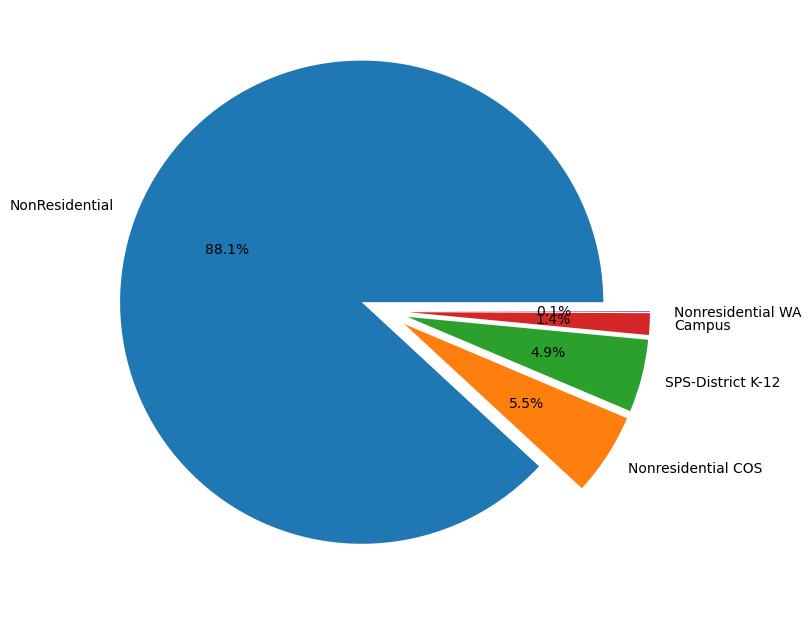

In [30]:
label = Data_clean['BuildingType'].unique()
plt.figure(figsize=(8,8), dpi = 100)
palette = sns.color_palette('bright')
plt.pie(Data_clean['BuildingType'].value_counts(), labels=label, autopct='%0.1f%%', explode =[0.1,0.1,0.1,0.1,0.1],
        #colors=palette, autopct='%0.1f%%',
       #textprops=dict(color="black",size=12)
       )
plt.show()

 ###### 3.1.2 Distribution of primary property types

 - Bar plots

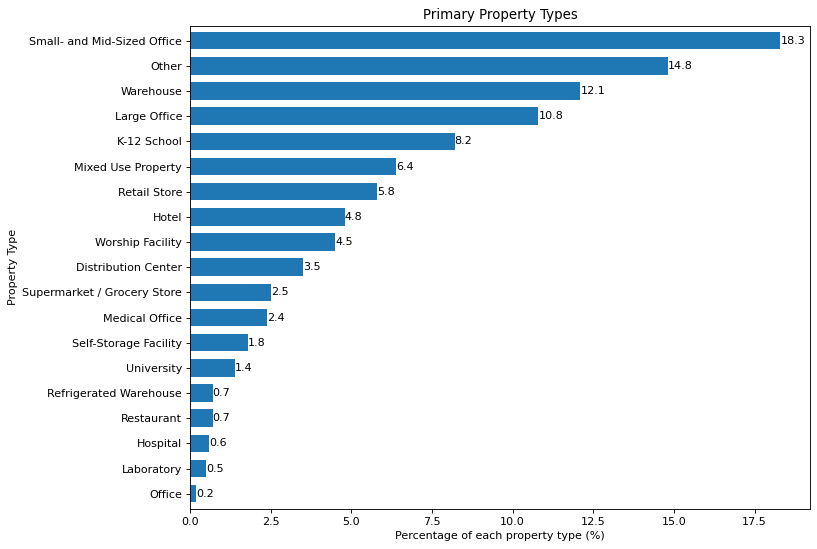

In [31]:
# Non-residential primary property type according to increasing frequency

plt.figure(figsize=(10,8), dpi = 80)
ax1 = round(Data_clean['PrimaryPropertyType'].value_counts(normalize = True) * 100, 1).sort_values().plot(kind = 'barh', 
                                                                                                    width = 0.7)
ax1.bar_label(ax1.containers[0], label_type='edge', color='black')
plt.ylabel('Property Type')
plt.xlabel('Percentage of each property type (%)')
plt.title('Primary Property Types')
plt.show()

Most of the non-residential properties are primarily used for small and mid-sized office

###### 3.1.3 Location of the buildings

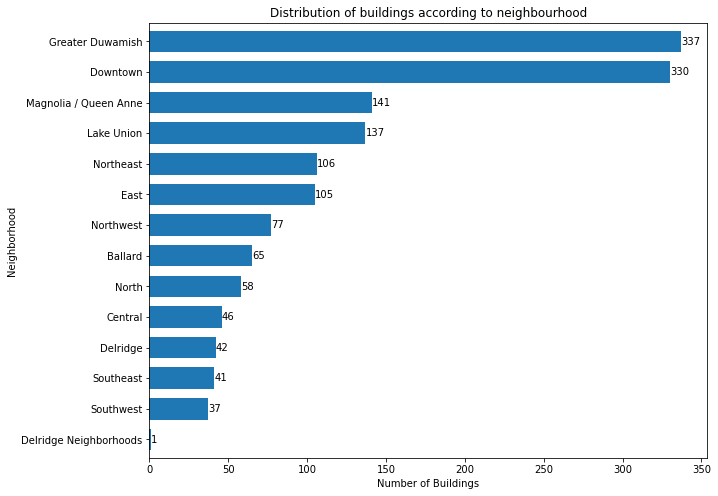

In [32]:
# Non-residential primary property type according to increasing frequency
plt.figure(figsize=(10,8))
ax1 = Data_clean['Neighborhood'].value_counts(ascending = True).plot(kind = 'barh', width = 0.7)
ax1.bar_label(ax1.containers[0], label_type='edge', color='black')
plt.ylabel('Neighborhood')
plt.xlabel('Number of Buildings')
plt.title('Distribution of buildings according to neighbourhood')
plt.show()

 Most of the datasets are from buildings located in Downtown and Greater Duwamish, and least from the Delridge Neighborhoods

###### 3.1.4 Distribution of the buildings according to year built and age

- Histograms

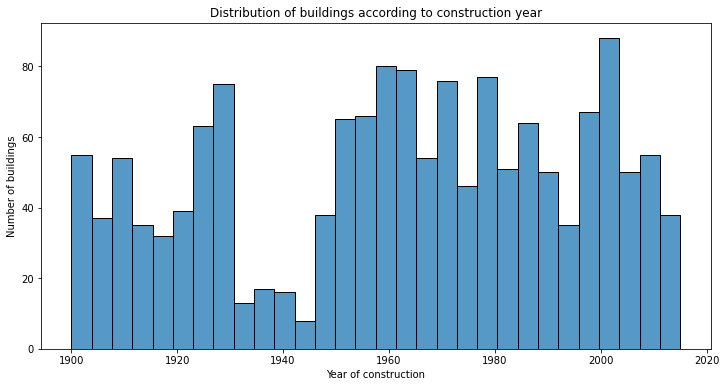

In [33]:
plt.figure(figsize=(12,6)) #set figure size
plt.grid(False) #set the background
sns.histplot(data = Data_clean, x = 'YearBuilt', bins = 30) # create a histogram plot
plt.ylabel('Number of buildings')
plt.xlabel('Year of construction')
plt.title('Distribution of buildings according to construction year')
plt.show()

- Transform YearBuilt to Age

In [34]:
#Data_clean['BuildingAge'] = np.array(Data_clean['YearBuilt'].max()) - np.array(Data_clean['YearBuilt'])   

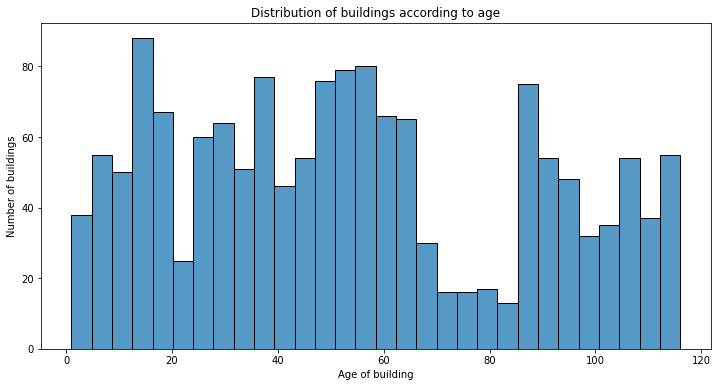

In [35]:
Data_clean['BuildingAge'] = Data_clean['DataYear'] - Data_clean['YearBuilt']   
plt.figure(figsize=(12,6)) #set figure size
plt.grid(False) #set the background
sns.histplot(data = Data_clean, x = 'BuildingAge', bins = 30) # create a histogram plot
plt.ylabel('Number of buildings')
plt.xlabel('Age of building')
plt.title('Distribution of buildings according to age')
plt.show()

###### 3.1.5 Distribution of numerical features and skewness

 - Distribution plots

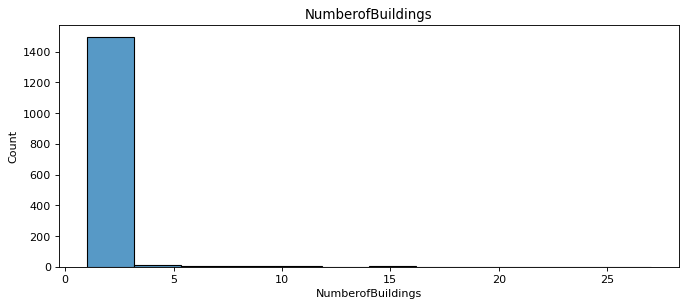

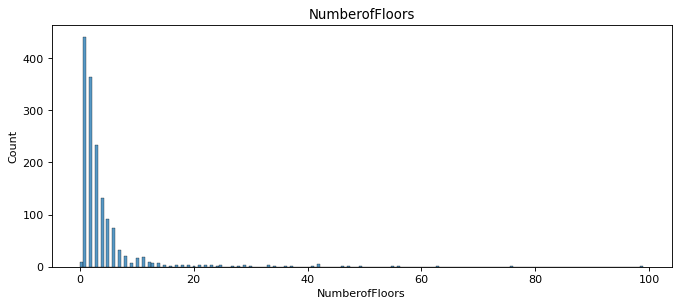

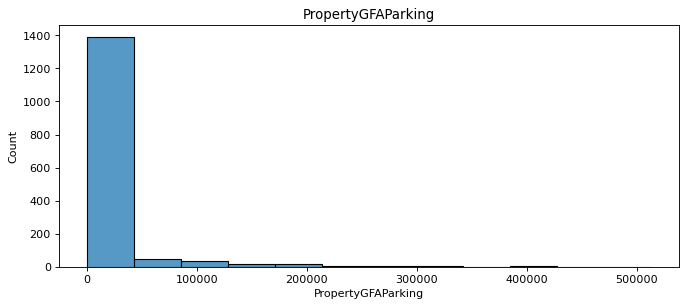

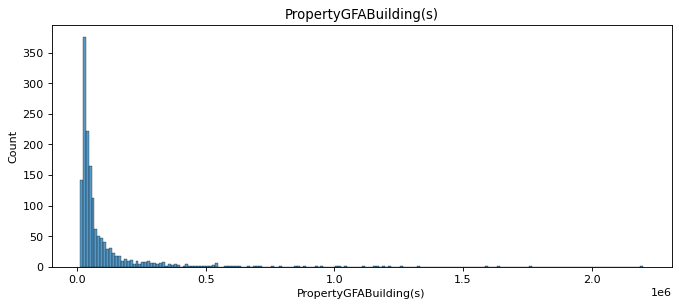

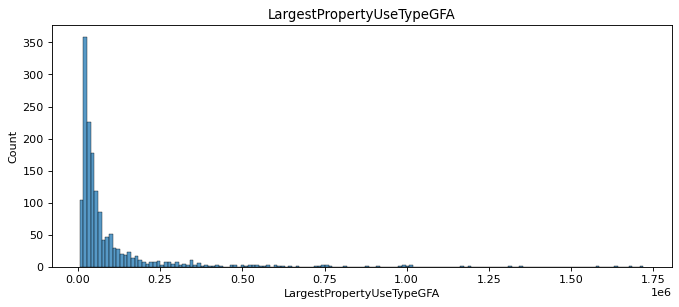

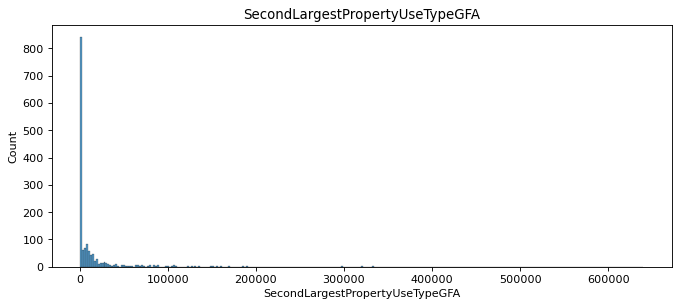

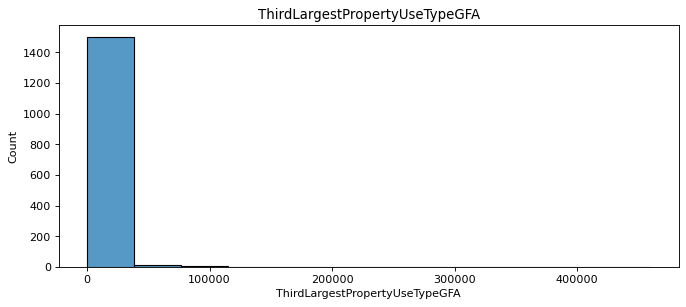

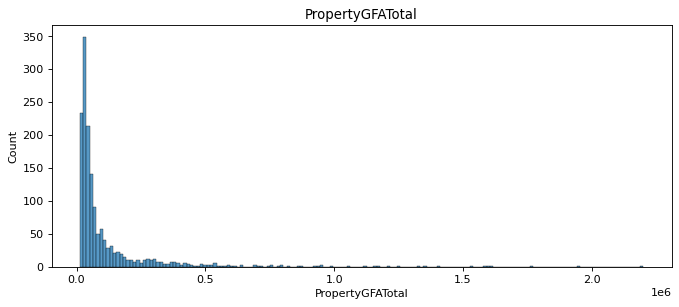

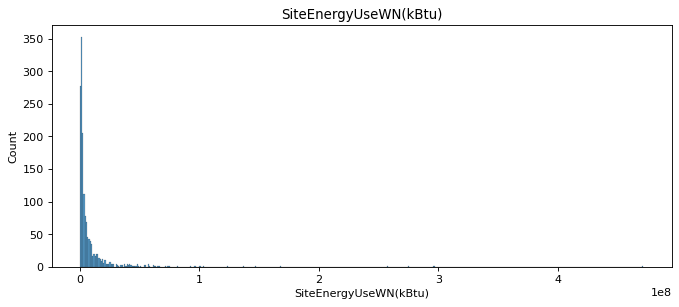

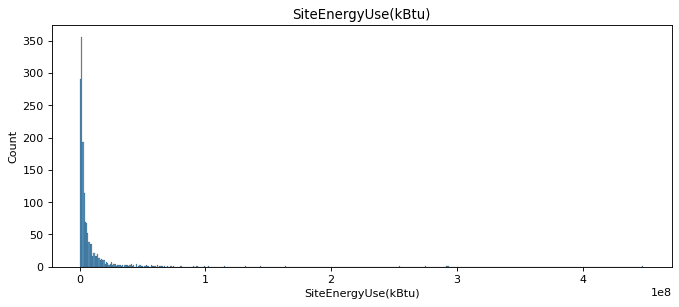

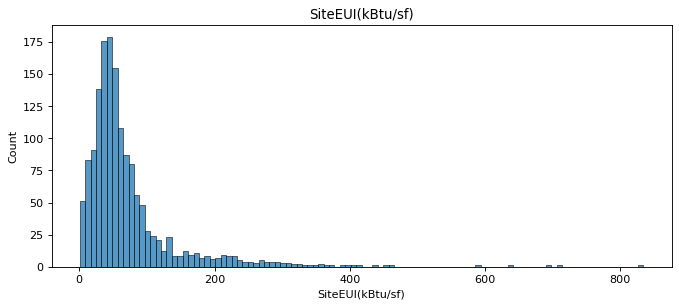

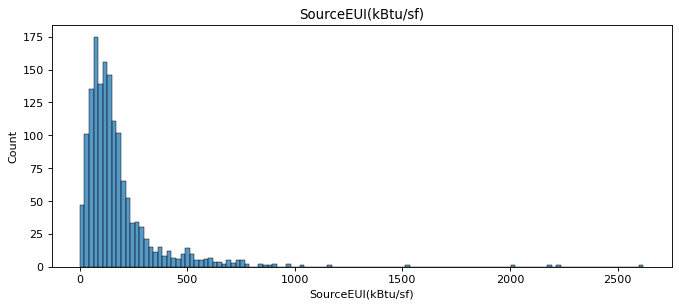

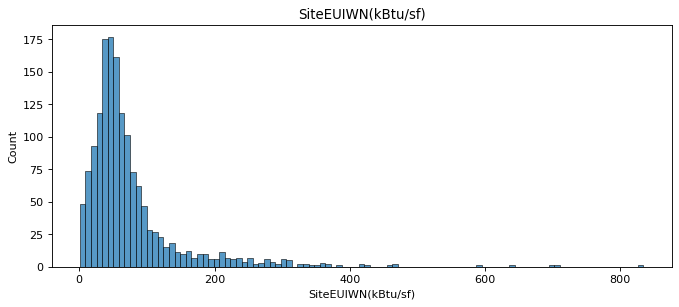

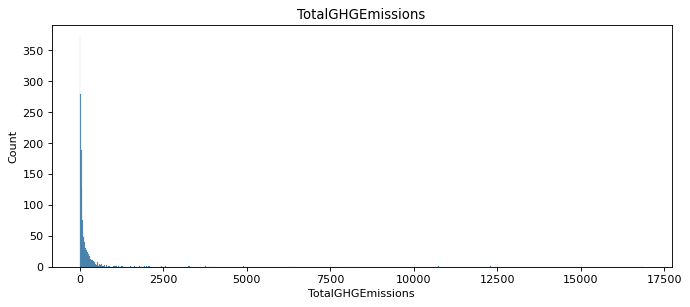

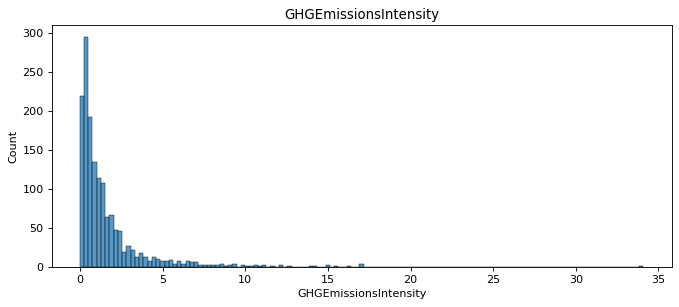

In [36]:
# remove energy score from the numerical list
num_feat = df_num.drop('ENERGYSTARScore', axis = 1).columns.tolist()

for feat in num_feat:
    plt.figure(figsize=(10, 4), dpi = 80)
    plt.grid(False) 
    sns.histplot(data = Data_clean, x = feat)
    plt.title(feat)
    #set_xlabel(feat)
    # display plot
    plt.show()

The numerical features are all skewed to the right

 - Skewness 

In [37]:
from scipy.stats import skew

skew_ness = Data_clean[num_feat].skew().sort_values(ascending = False)
skewness = pd.DataFrame({"Skew" : skew_ness})
skew_ness

ThirdLargestPropertyUseTypeGFA     17.200877
TotalGHGEmissions                  14.828654
NumberofBuildings                  14.058075
SiteEnergyUseWN(kBtu)              11.122218
SiteEnergyUse(kBtu)                10.870714
NumberofFloors                      6.072161
PropertyGFABuilding(s)              5.416197
LargestPropertyUseTypeGFA           5.246147
SecondLargestPropertyUseTypeGFA     5.230150
PropertyGFAParking                  5.194067
PropertyGFATotal                    5.021084
SourceEUI(kBtu/sf)                  5.002436
GHGEmissionsIntensity               4.632727
SiteEUI(kBtu/sf)                    3.687046
SiteEUIWN(kBtu/sf)                  3.604924
dtype: float64

### 3.2 Bivariate and multivariate analysis
 - relationships between features 

###### 3.2.1 Influence of building age on energy consumption and gas emission

- numerical vs catergorical variables

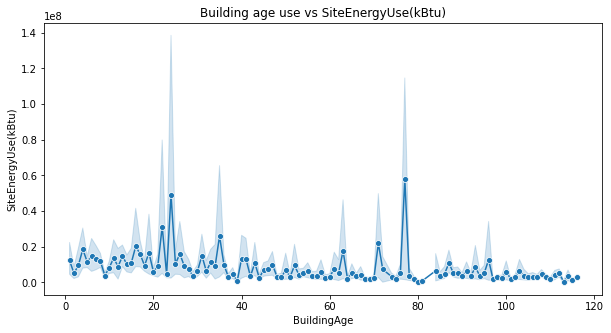

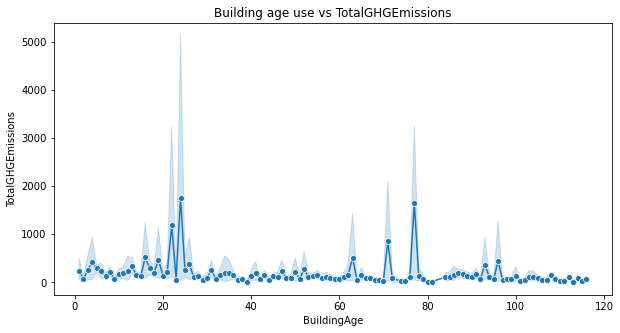

In [38]:
def lineplot(X, Y):
    plt.figure(figsize=(10,5))
    plt.grid(False)
    plot = sns.lineplot(data = Data_clean, x = X, y = Y, marker='o')
    return plot

E_G = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

for x in E_G:
    lineplot('BuildingAge', x)
    plt.title(f"Building age use vs {x}")
    plt.show()

- Binning of the building age at 10 years interval

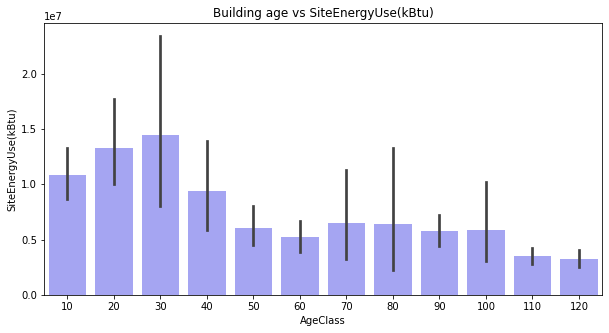

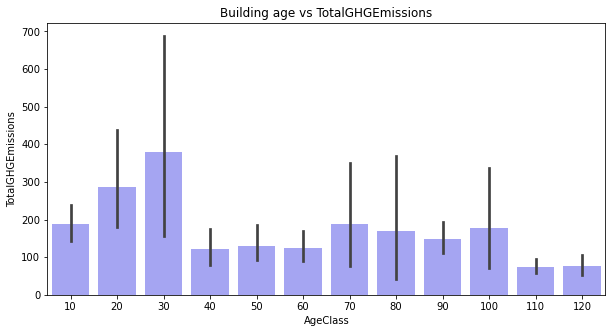

In [39]:
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 120]
labels = ['10', '20','30','40','50','60','70','80','90','100', '110', '120']

# Add the binned values as new categorical features 
Data_clean['AgeClass'] = pd.cut(Data_clean['BuildingAge'], bins = bins, labels=labels, include_lowest = True)

def barplot(X, Y):
    plt.figure(figsize=(10,5))
    plt.grid(False)
    plot = sns.barplot(data = Data_clean, x = X, y=Y, color = "blue", alpha=.4) 
    return plot

for x in E_G:
    barplot('AgeClass', x)
    plt.title(f"Building age vs {x}")
    plt.show()

- Younger buildings consumes more energy and emit more gases than older ones

###### 3.2.2 Influence of Building type on energy consumption and gas emission

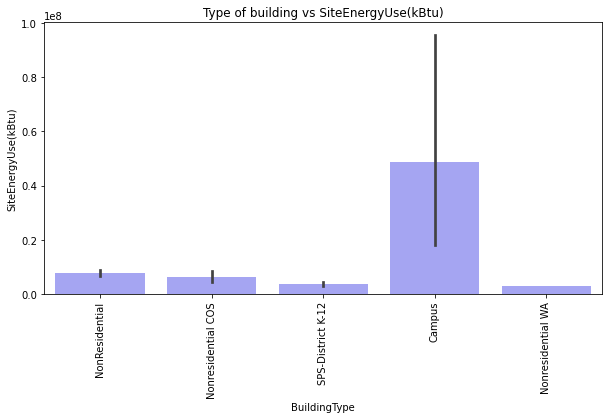

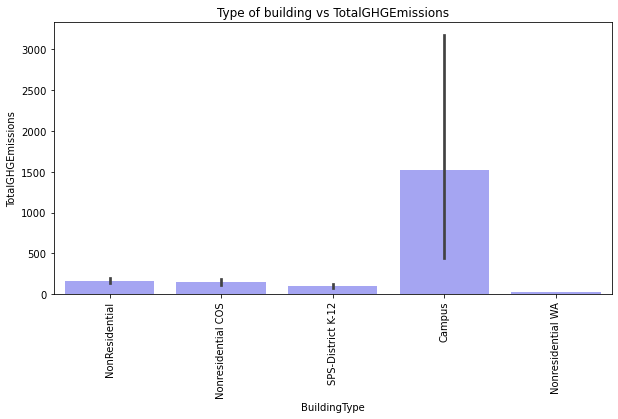

In [40]:
# Building Type 
for x in E_G:
    barplot('BuildingType', x)
    plt.title(f"Type of building vs {x}")
    plt.xticks(rotation=90)
    plt.show()

- Campus is the highest consumer and emitter of gases

###### 3.2.3 Influence of property type on energy consumption and gas emission

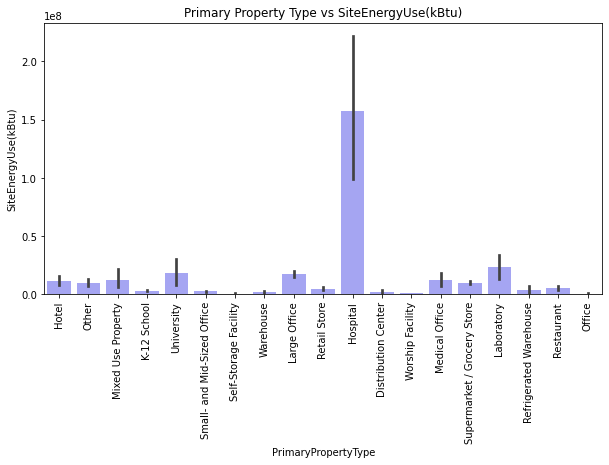

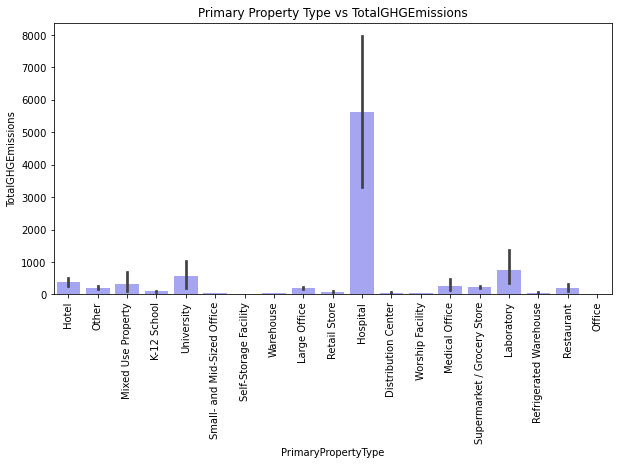

In [41]:
for x in E_G:
    barplot('PrimaryPropertyType', x)
    plt.title(f"Primary Property Type vs {x}")
    plt.xticks(rotation=90)
    plt.show()

 - Hospitals, Laboratories, and Unniversities are the highest consumers of energy and emitter of gases 

###### 3.2.3 Scatter plots
 - relationships between numercial features and targets

 - Between the two targets

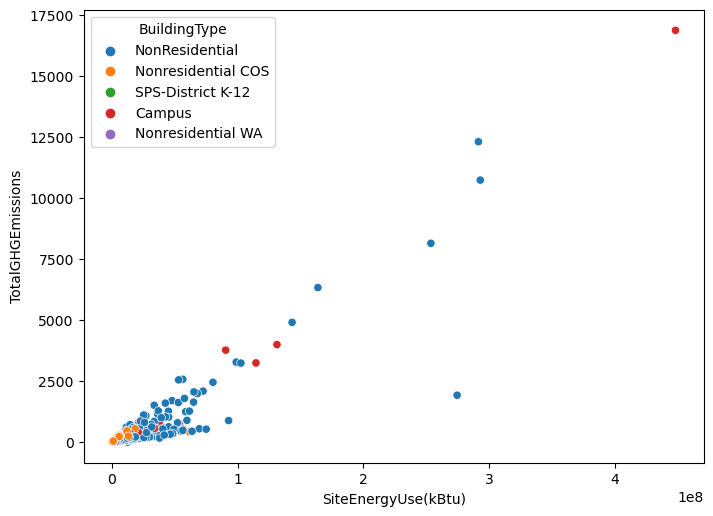

In [42]:
#Scatter plots of numeric features against Site Energy Use Intensity wind corrected(kBtu/sf)

def scatterplot(X, Y):
    plt.figure(figsize=(8,6), dpi = 100)
    plt.grid(False)
    plot = sns.scatterplot(x = X, y = Y, data = Data_clean, hue = 'BuildingType') 
    return plot

scatterplot('SiteEnergyUse(kBtu)','TotalGHGEmissions')
plt.show()

 - numeric features vs energy use

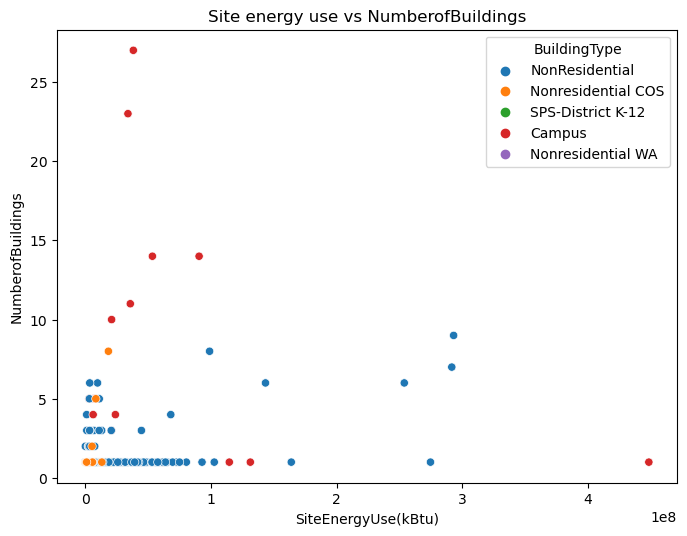

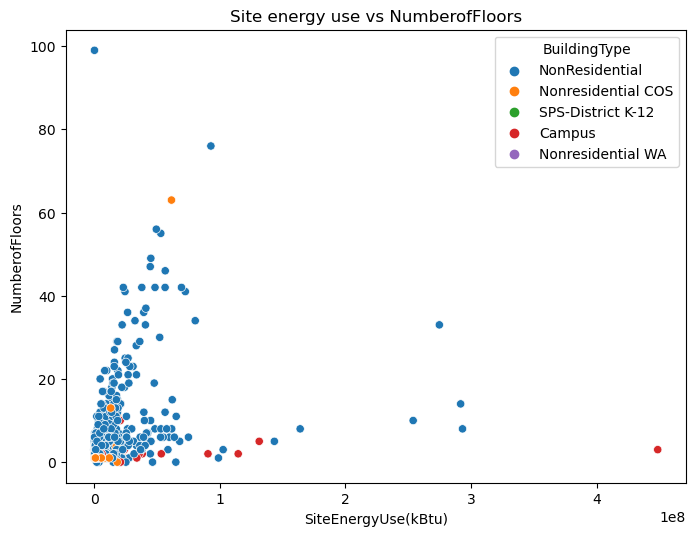

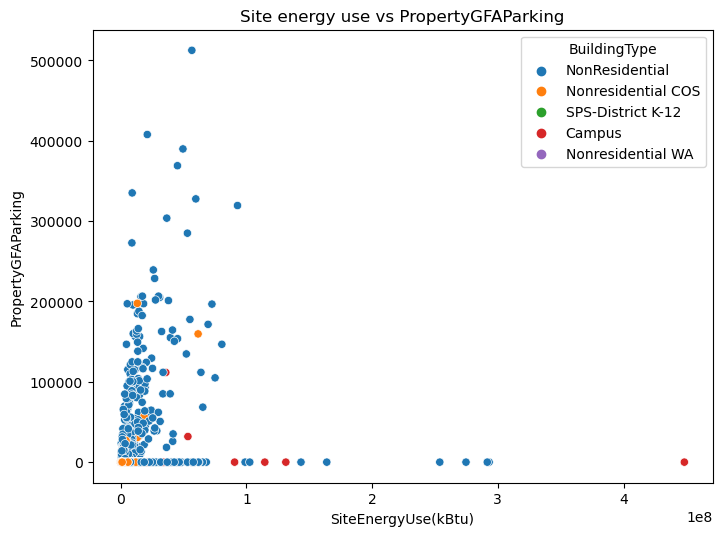

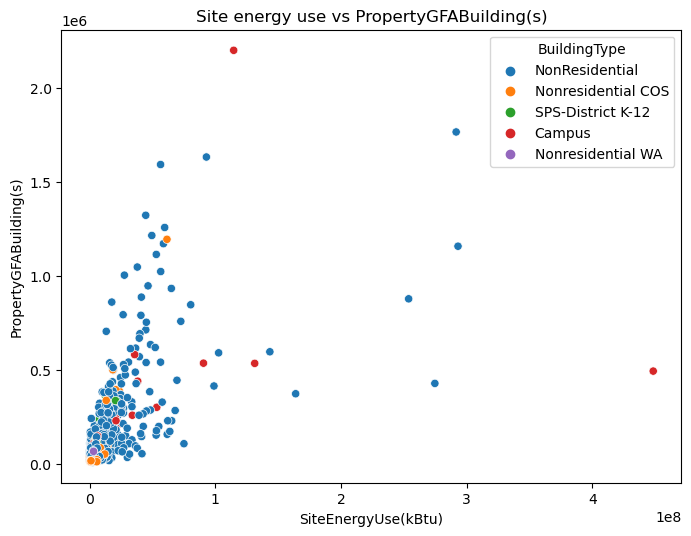

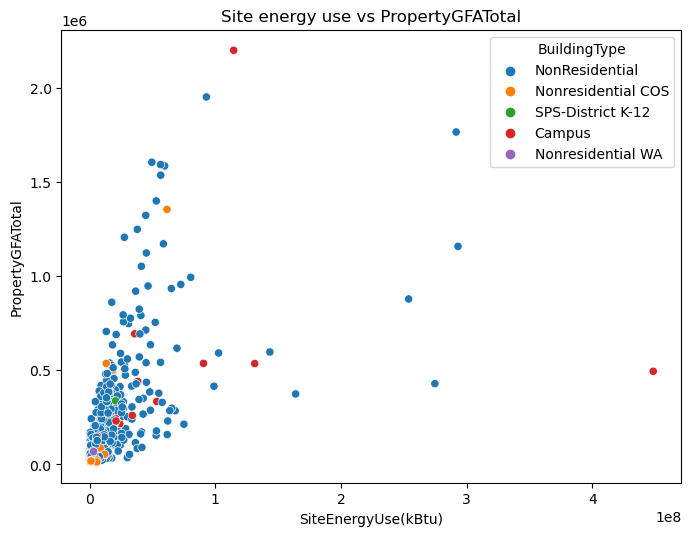

In [43]:
Cols = ['NumberofBuildings','NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'PropertyGFATotal']

for col in Cols:
    scatterplot('SiteEnergyUse(kBtu)', col)
    plt.title(f"Site energy use vs {col}")
    plt.show()

- numeric features vs Emission Intensity

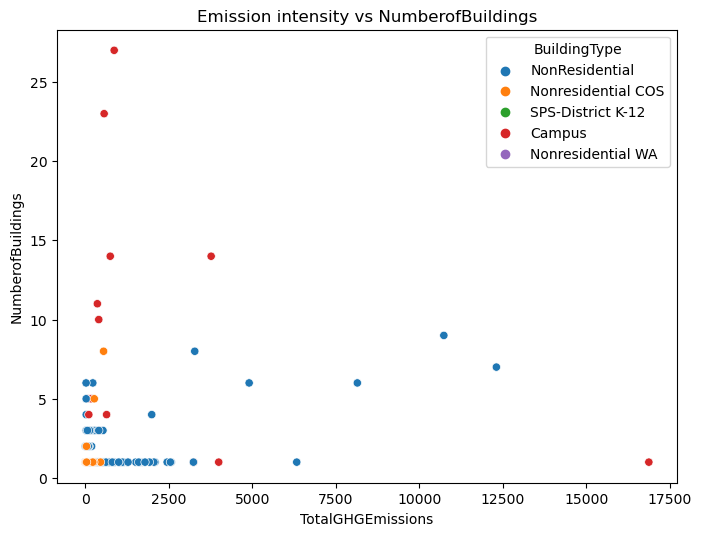

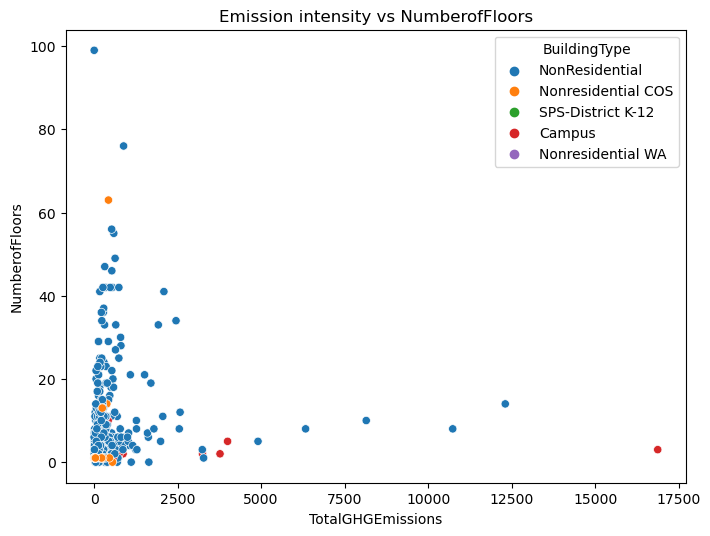

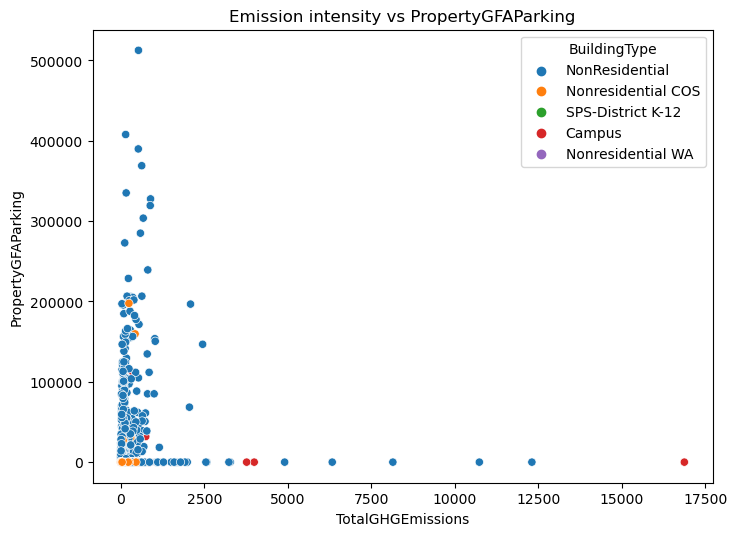

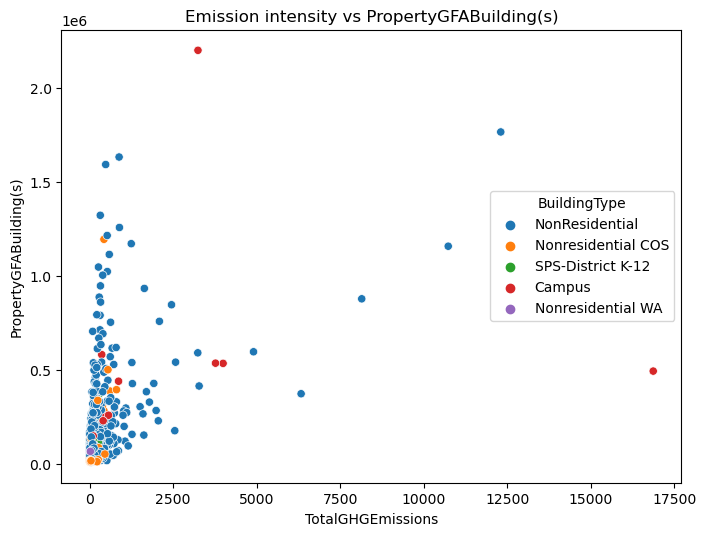

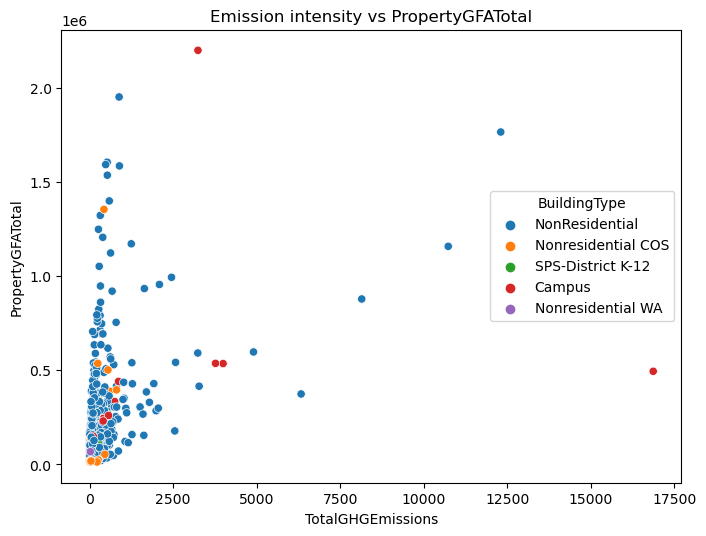

In [44]:
#numeric variables against Emission Intensity

for col in Cols:
    scatterplot('TotalGHGEmissions', col)
    plt.title(f"Emission intensity vs {col}")
    plt.show()

###### 3.2.4 Outlier detection

In [45]:
# calculate Q1 and Q3
Q1 = Data_clean[num_feat].quantile(0.25)
Q3 = Data_clean[num_feat].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = Data_clean[num_feat][((Data_clean[num_feat] < (Q1 - 1.5 * IQR)) |(Data_clean[num_feat] > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFATotal,SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
0,1.0,12,0,88434,88434.0,0.0,0.0,88434,7.456910e+06,7.226362e+06,81.699997,182.500000,84.300003,249.98,2.83
1,1.0,11,15064,88502,83880.0,15064.0,4622.0,103566,8.664479e+06,8.387933e+06,94.800003,176.100006,97.900002,295.86,2.86
2,1.0,41,196718,759392,756493.0,0.0,0.0,956110,7.393711e+07,7.258702e+07,96.000000,241.899994,97.699997,2089.28,2.19
3,1.0,10,0,61320,61320.0,0.0,0.0,61320,6.946800e+06,6.794584e+06,110.800003,216.199997,113.300003,286.43,4.67
4,1.0,18,62000,113580,123445.0,68009.0,0.0,175580,1.465650e+07,1.417261e+07,114.800003,211.399994,118.699997,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,1.0,1,0,23445,23445.0,0.0,0.0,23445,6.716330e+06,5.976246e+06,254.899994,380.100006,286.500000,259.22,11.06
3368,1.0,1,0,20050,8108.0,7726.0,3779.0,20050,1.993137e+06,1.813404e+06,90.400002,175.199997,99.400002,60.81,3.03
3373,1.0,1,0,13157,7583.0,5574.0,0.0,13157,6.053764e+06,5.765898e+06,438.200012,744.799988,460.100006,223.54,16.99
3374,1.0,1,0,14101,6601.0,6501.0,484.0,14101,7.828413e+05,7.194712e+05,51.000000,105.300003,55.500000,22.11,1.57


###### - narration:
 - The number of rows with detected outliers by the interquantile method are too numerous to be treated as outliers. The interquatile distribution rather show the variability in the numerical features
 - However, the scatter plots of the numeric variables against Emission intensity show that most of the data plot to the left while one data fall in the extreme right. This value is treated as an outlier and deleted from the dataset.

In [46]:
Data_clean = Data_clean[~((Data_clean['SiteEnergyUse(kBtu)'] > 4*10**8) | (Data_clean['TotalGHGEmissions'] > 15000))]

###### 3.2.5 Correlation heat map
 - correlation matrix to show the strenght of the relationships between all features

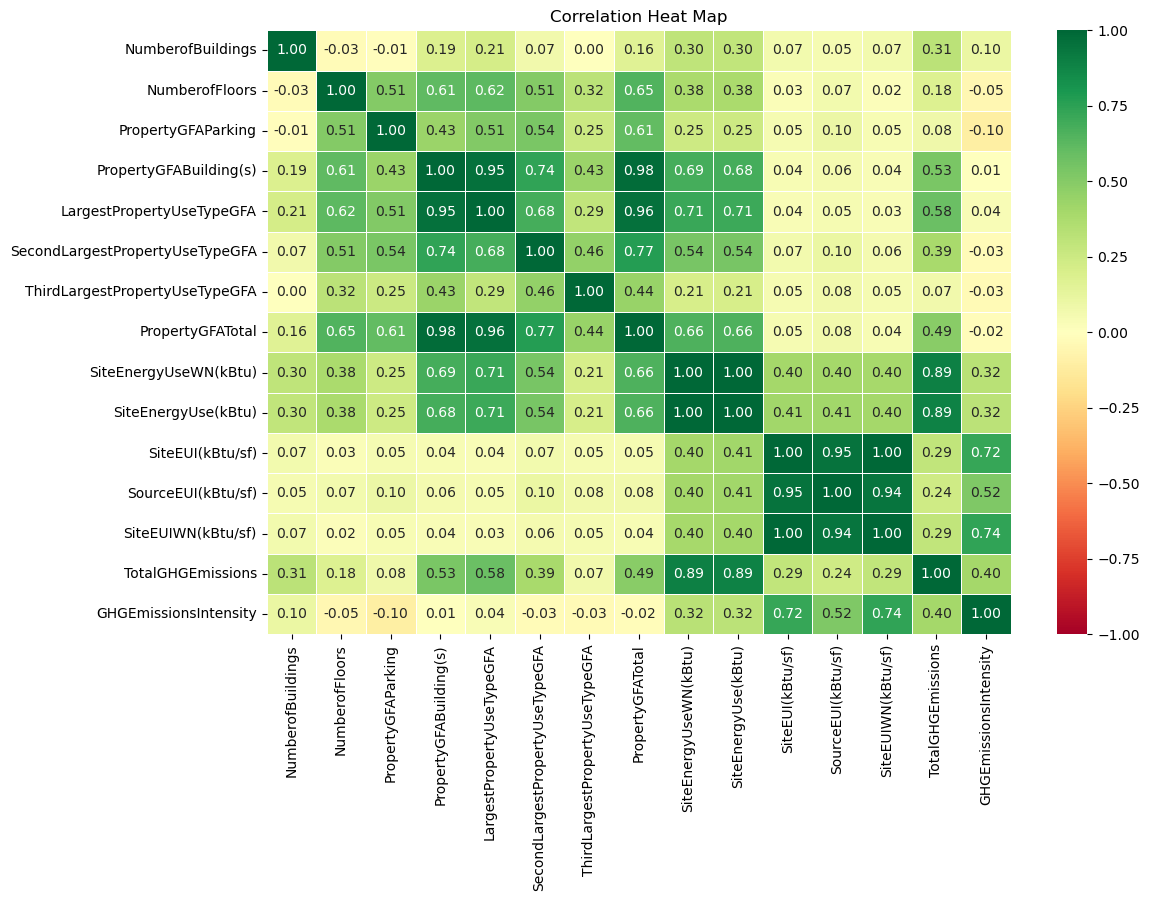

In [47]:
plt.figure(figsize=(12, 8), dpi = 100)
sns.heatmap(Data_clean[num_feat].corr(), fmt='.2f', center=0, cmap='RdYlGn', vmin=-1, vmax=1, annot=True, linewidths=.5)
plt.title('Correlation Heat Map')
plt.show()

###### - narration: 
Using a threshold correlation coefficient of 0.7:
 - SiteEnergyUseWN(kBtu) strongly correlates with the targets (SiteEnergyUse(kBtu) and TotalGhGEmissions)
 - SourceEUI(kBtu/sf) is strongly correlated with SiteEUI(kBtu/sf) and SiteEUIWN(kBtu/sf). 
 - SiteEUI(kBtu/sf) and SiteEUIWN(kBtu/sf) strongly correlates with GHGEmissionsIntensity
 - Therefore, SiteEnergyUseWN(kBtu), SourceEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SiteEUI(kBtu/sf), and GHGEmissionsIntensity are dropped  to prevent multicollinearity.
 
 - Similarly, there is a moderate to strong correlations between PropertyGFABuildings, LargestPropertyUseGFA, SecondLargestPropertyUseGFA and PropertyGFAParking and PropertyGFATotal. PropertyGFABuilding and PropertyGFATotal are dropped since they are the total of the building properties and parkings, respectively.
 
 - The PropertyGFATotal is normalized to 'NumberofBuildings' and 'NumberofFloors' to determine the surface area per building and floor, respectively

###### 3.2.6 Feature engineering

 - Determine the surface area per building and number of floor(s)

In [48]:
#per building
Data_clean['AreaPerBuilding'] = round(Data_clean['PropertyGFATotal']/Data_clean['NumberofBuildings'], 0)

# per floor
Data_clean['AreaPerFloor'] = round(Data_clean['PropertyGFATotal']/Data_clean['NumberofFloors'],0)

 - Drop unnecessary columns

In [49]:
Un_columns = ['DataYear', 'AgeClass', 'YearBuilt', 'PropertyGFABuilding(s)', 'PropertyGFATotal', 'SourceEUI(kBtu/sf)',
              'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)']
Final_Data = Data_clean.drop(Un_columns, axis = 1)

### 4.0 Essential features for modeling

In [50]:
Final_Data.columns

Index(['BuildingType', 'Neighborhood', 'PrimaryPropertyType',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'BuildingAge', 'AreaPerBuilding', 'AreaPerFloor'],
      dtype='object')

In [51]:
#Export and save the final dataframe to csv file for predictions

Final_Data.to_csv("Data_Energy.csv", index = False) 